###  Roboflow Datasets

A continuación se encuentran los enlaces a los conjuntos de datos utilizados en este proyecto:

- 🔹 **[Tile Camera Fruits Dataset](https://app.roboflow.com/university-xib5d/tile-camera-fruits-ojojf/1)**  
  Conjunto de datos basado en imágenes por mosaicos (tiles) de frutas capturadas por cámara.

- 🔹 **[Normal Fruits Dataset](https://universe.roboflow.com/isdp-n2uvz/fyp-molyt)**  
  Conjunto de datos estándar de frutas, sin segmentación por mosaicos.

In [ ]:
%cd /content/drive/MyDrive/VisionIIA/ModeltilesSize
%pwd

/content/drive/MyDrive/VisionIIA/ModeltilesSize


'/content/drive/MyDrive/VisionIIA/ModeltilesSize'

In [6]:
!pip install ultralytics

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 100.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR-API-KEY-ROBOFLOW")
project = rf.workspace("university-xib5d").project("tile-camera-fruits-ojojf")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tile-camera-fruits-1 in yolov11:: 100%|██████████| 786/786 [00:05<00:00, 144.06it/s]


In [ ]:

from ultralytics import YOLO
import os
from PIL import Image
import numpy as np

# ============================================
# 1. ANALIZAR TAMAÑOS DE IMÁGENES
# ============================================
image_folder = '/content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/train/images'

# Obtener lista de imágenes
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

if not image_files:
    print("⚠️ No se encontraron imágenes en la carpeta")
else:
    widths = []
    heights = []

    print(f"📊 Analizando {len(image_files)} imágenes...\n")

    # Analizar primeras 100 imágenes (o todas si son menos)
    sample_size = min(100, len(image_files))

    for img_file in image_files[:sample_size]:
        img_path = os.path.join(image_folder, img_file)
        try:
            with Image.open(img_path) as img:
                widths.append(img.width)
                heights.append(img.height)
        except Exception as e:
            print(f"Error con {img_file}: {e}")

    if widths and heights:
        # Estadísticas
        avg_width = np.mean(widths)
        avg_height = np.mean(heights)
        max_width = np.max(widths)
        max_height = np.max(heights)
        min_width = np.min(widths)
        min_height = np.min(heights)

        print("=" * 50)
        print("📏 ESTADÍSTICAS DE TAMAÑO DE IMÁGENES")
        print("=" * 50)
        print(f"Ancho promedio:  {avg_width:.0f}px")
        print(f"Alto promedio:   {avg_height:.0f}px")
        print(f"Ancho máximo:    {max_width:.0f}px")
        print(f"Alto máximo:     {max_height:.0f}px")
        print(f"Ancho mínimo:    {min_width:.0f}px")
        print(f"Alto mínimo:     {min_height:.0f}px")
        print("=" * 50)

        # Recomendar tamaño imgsz
        max_dim = max(max_width, max_height)

        # Tamaños comunes para YOLO (múltiplos de 32)
        yolo_sizes = [320, 416, 480, 512, 640, 800, 960, 1024, 1280]

        recommended_size = 640  # Default
        for size in yolo_sizes:
            if size >= max_dim * 0.8:  # Al menos 80% del tamaño máximo
                recommended_size = size
                break

        print(f"\n💡 TAMAÑO RECOMENDADO: imgsz={recommended_size}")
        print(f"   - Para mayor velocidad: imgsz=640")
        print(f"   - Para mayor precisión: imgsz=800 o imgsz=1024")
        print("=" * 50)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
📊 Analizando 348 imágenes...

📏 ESTADÍSTICAS DE TAMAÑO DE IMÁGENES
Ancho promedio:  160px
Alto promedio:   160px
Ancho máximo:    160px
Alto máximo:     160px
Ancho mínimo:    160px
Alto mínimo:     160px

💡 TAMAÑO RECOMENDADO: imgsz=320
   - Para mayor velocidad: imgsz=640
   - Para mayor precisión: imgsz=800 o imgsz=1024


In [ ]:
from ultralytics import YOLO

# Definir la ruta al archivo data.yaml
data_yaml = '/content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/data.yaml'

# Inicializar el modelo YOLOv11 pre-entrenado en COCO para segmentación
model = YOLO('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11n-seg.pt')

# Entrenar el modelo (fine-tuning)
results = model.train(
    data=data_yaml,
    epochs=100,  # Número de épocas
    imgsz=160,   # Tamaño de la imagen de entrada
    batch=16,    # Tamaño del batch
    name='yolov11n_seg_custom_transfer',  # Nombre para guardar los resultados
    pretrained=True,  # Usar pesos pre-entrenados
    freeze=10,  # Congelar las primeras 10 capas
    lr0=0.001,  # Tasa de aprendizaje inicial
    #patience=50,  # Paciencia para early stopping
    save=True,  # Guardar los mejores checkpoints
    device='0'  # Usar GPU 0 (cambia a 'cpu' si no tienes GPU)
)

# Evaluar el modelo en el conjunto de validación
val_results = model.val()

Ultralytics 8.3.208 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=160, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=weights/yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11n_seg_custom_transfer, nbs=64, nms=False, opset=None, optimize=False, op


image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Apple_4c_JPG.rf.a00dc3aa466f846ed72397aaabbdc6b7.jpg: 160x160 1 apple, 12.8ms
Speed: 0.4ms preprocess, 12.8ms inference, 12.1ms postprocess per image at shape (1, 3, 160, 160)


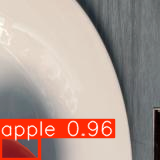

Detecciones para Apple_4c_JPG.rf.a00dc3aa466f846ed72397aaabbdc6b7.jpg:
Número de objetos detectados: 1
  Clase: apple, Confianza: 0.96



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Apple_7d_JPG.rf.5556e5ec2bf14ecf1d42b10d7d9c4fcf.jpg: 160x160 1 apple, 12.3ms
Speed: 0.5ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 160, 160)


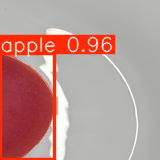

Detecciones para Apple_7d_JPG.rf.5556e5ec2bf14ecf1d42b10d7d9c4fcf.jpg:
Número de objetos detectados: 1
  Clase: apple, Confianza: 0.96



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Apple_7e_JPG.rf.79f1cfb6514d05548c5f48353fed59db.jpg: 160x160 1 banana, 9.8ms
Speed: 0.4ms preprocess, 9.8ms inference, 1.9ms postprocess per image at shape (1, 3, 160, 160)


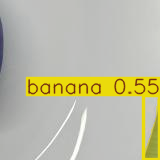

Detecciones para Apple_7e_JPG.rf.79f1cfb6514d05548c5f48353fed59db.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.55



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_1b_JPG.rf.10e63f364650fe982a8f53e62a938d37.jpg: 160x160 1 banana, 10.0ms
Speed: 0.4ms preprocess, 10.0ms inference, 1.8ms postprocess per image at shape (1, 3, 160, 160)


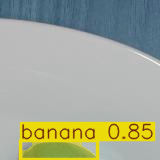

Detecciones para Banana_1b_JPG.rf.10e63f364650fe982a8f53e62a938d37.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.85



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_1d_JPG.rf.88c50815fe15ed23b337939e5ea97e28.jpg: 160x160 1 banana, 10.6ms
Speed: 0.4ms preprocess, 10.6ms inference, 1.9ms postprocess per image at shape (1, 3, 160, 160)


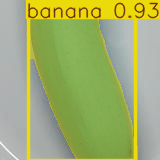

Detecciones para Banana_1d_JPG.rf.88c50815fe15ed23b337939e5ea97e28.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.93



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_1d_JPG.rf.aca2b5c33be44d99589976e3655ae652.jpg: 160x160 1 banana, 11.9ms
Speed: 0.5ms preprocess, 11.9ms inference, 2.2ms postprocess per image at shape (1, 3, 160, 160)


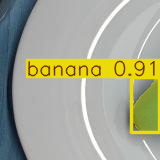

Detecciones para Banana_1d_JPG.rf.aca2b5c33be44d99589976e3655ae652.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.91



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_2a_JPG.rf.0841ca3a5ee80b0c4ee43f37f063d09f.jpg: 160x160 (no detections), 11.3ms
Speed: 0.4ms preprocess, 11.3ms inference, 0.4ms postprocess per image at shape (1, 3, 160, 160)


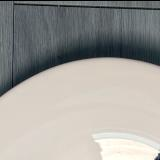

Detecciones para Banana_2a_JPG.rf.0841ca3a5ee80b0c4ee43f37f063d09f.jpg:
Número de objetos detectados: 0



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_2a_JPG.rf.304f63bbe2f07df2df44e14ba2be4036.jpg: 160x160 1 banana, 12.1ms
Speed: 0.4ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 160, 160)


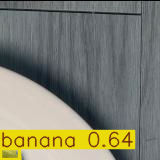

Detecciones para Banana_2a_JPG.rf.304f63bbe2f07df2df44e14ba2be4036.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.64



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_2d_JPG.rf.2b033ac0bf24985edfa189228a35bea2.jpg: 160x160 1 banana, 14.3ms
Speed: 0.5ms preprocess, 14.3ms inference, 2.0ms postprocess per image at shape (1, 3, 160, 160)


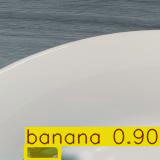

Detecciones para Banana_2d_JPG.rf.2b033ac0bf24985edfa189228a35bea2.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.90



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_3b_JPG.rf.18556163a27339ccde51e1495c638e5d.jpg: 160x160 1 banana, 11.9ms
Speed: 0.4ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 160, 160)


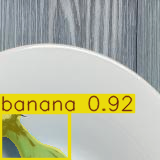

Detecciones para Banana_3b_JPG.rf.18556163a27339ccde51e1495c638e5d.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.92



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_3b_JPG.rf.ae1518ff699e5f617d31f2361da3383f.jpg: 160x160 1 banana, 13.5ms
Speed: 0.5ms preprocess, 13.5ms inference, 2.1ms postprocess per image at shape (1, 3, 160, 160)


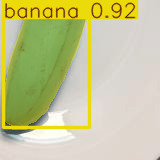

Detecciones para Banana_3b_JPG.rf.ae1518ff699e5f617d31f2361da3383f.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.92



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_3d_JPG.rf.ac021bdbbe760d11256569e2640f3cb0.jpg: 160x160 1 banana, 14.6ms
Speed: 0.4ms preprocess, 14.6ms inference, 2.0ms postprocess per image at shape (1, 3, 160, 160)


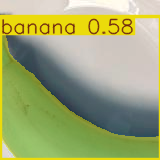

Detecciones para Banana_3d_JPG.rf.ac021bdbbe760d11256569e2640f3cb0.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.58



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_4d_JPG.rf.9a5797a3a4b76ec25e77b252a2152b76.jpg: 160x160 1 banana, 14.9ms
Speed: 0.8ms preprocess, 14.9ms inference, 1.9ms postprocess per image at shape (1, 3, 160, 160)


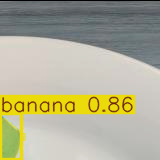

Detecciones para Banana_4d_JPG.rf.9a5797a3a4b76ec25e77b252a2152b76.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.86



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_4e_JPG.rf.01ded6deedb617119b8ecce9c84d1bc1.jpg: 160x160 1 banana, 13.0ms
Speed: 0.4ms preprocess, 13.0ms inference, 2.4ms postprocess per image at shape (1, 3, 160, 160)


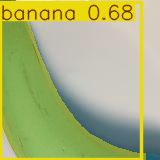

Detecciones para Banana_4e_JPG.rf.01ded6deedb617119b8ecce9c84d1bc1.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.68



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_4e_JPG.rf.763524edb83e708258f5eb74b17b3069.jpg: 160x160 1 banana, 13.5ms
Speed: 0.4ms preprocess, 13.5ms inference, 2.6ms postprocess per image at shape (1, 3, 160, 160)


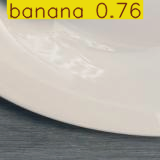

Detecciones para Banana_4e_JPG.rf.763524edb83e708258f5eb74b17b3069.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.76



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_5d_JPG.rf.ba2eff95d544ddc098f0c4b8b55c87ec.jpg: 160x160 1 banana, 12.7ms
Speed: 0.5ms preprocess, 12.7ms inference, 2.6ms postprocess per image at shape (1, 3, 160, 160)


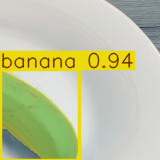

Detecciones para Banana_5d_JPG.rf.ba2eff95d544ddc098f0c4b8b55c87ec.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.94



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_6a_JPG.rf.91f525e6f1d4d40776ed1c5387bea788.jpg: 160x160 1 banana, 13.8ms
Speed: 0.4ms preprocess, 13.8ms inference, 3.7ms postprocess per image at shape (1, 3, 160, 160)


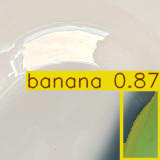

Detecciones para Banana_6a_JPG.rf.91f525e6f1d4d40776ed1c5387bea788.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.87



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_6c_JPG.rf.da080edea1069dd01629381754d1a1b0.jpg: 160x160 1 banana, 13.7ms
Speed: 0.6ms preprocess, 13.7ms inference, 2.7ms postprocess per image at shape (1, 3, 160, 160)


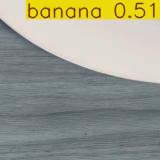

Detecciones para Banana_6c_JPG.rf.da080edea1069dd01629381754d1a1b0.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.51



image 1/1 /content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images/Banana_6d_JPG.rf.34f13dd3107b6e428fbf9abe29dbc43f.jpg: 160x160 1 banana, 14.0ms
Speed: 1.5ms preprocess, 14.0ms inference, 2.6ms postprocess per image at shape (1, 3, 160, 160)


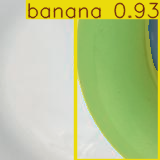

Detecciones para Banana_6d_JPG.rf.34f13dd3107b6e428fbf9abe29dbc43f.jpg:
Número de objetos detectados: 1
  Clase: banana, Confianza: 0.93


Resultados guardados en validation_results


In [ ]:
from ultralytics import YOLO
import glob
import cv2
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
import numpy as np

# Cargar el modelo entrenado
model = YOLO('/content/drive/MyDrive/VisionIIA/ModeltilesSize/runs/segment/yolov11n_seg_custom_transfer/weights/best.pt')  # Ajusta esta ruta a donde se guardó tu mejor modelo

# Directorio que contiene las imágenes para validar
image_dir = '/content/drive/MyDrive/VisionIIA/ModeltilesSize/tile-camera-fruits-1/test/images'  # Ajusta esta ruta a tu directorio de imágenes

# Obtener todas las imágenes en el directorio
image_files = glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir, '*.png'))

# Crear un directorio para guardar los resultados
results_dir = 'validation_results'
os.makedirs(results_dir, exist_ok=True)

# Procesar cada imagen
for img_path in image_files:
    # Realizar la predicción
    results = model(img_path)

    # Obtener la imagen con las detecciones dibujadas
    img = results[0].plot()

    # Convertir de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Guardar la imagen con las detecciones
    output_path = os.path.join(results_dir, os.path.basename(img_path))
    cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

    # Mostrar la imagen usando cv2_imshow
    cv2_imshow(img_rgb)

    # Mostrar información sobre las detecciones
    print(f"Detecciones para {os.path.basename(img_path)}:")
    for r in results:
        print(f"Número de objetos detectados: {len(r.boxes)}")
        for box in r.boxes:
            print(f"  Clase: {model.names[int(box.cls)]}, Confianza: {box.conf.item():.2f}")

    print("\n")  # Agregar una línea en blanco entre imágenes

print(f"Resultados guardados en {results_dir}")

In [ ]:
"""
Sistema de Segmentación de Instancias con Tiling para YOLO
Este script divide imágenes grandes en tiles, realiza segmentación en cada tile,
y reconstruye la segmentación completa de la imagen original.
"""

import os
import cv2
import numpy as np
from pathlib import Path
from typing import List, Tuple, Dict
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

class TiledYOLOSegmentation:
    """
    Clase para realizar segmentación de instancias en imágenes grandes usando tiling.
    """

    def __init__(self, model_path: str, tile_size: int = 160, overlap: int = 0):
        """
        Inicializa el sistema de segmentación con tiling.

        Args:
            model_path: Ruta al modelo YOLO entrenado (.pt)
            tile_size: Tamaño de los tiles (debe coincidir con el tamaño de entrenamiento)
            overlap: Píxeles de solapamiento entre tiles para mejorar detección en bordes
        """
        self.model = YOLO(model_path)
        self.tile_size = tile_size
        self.overlap = overlap
        self.stride = tile_size - overlap

    def create_tiles(self, image: np.ndarray) -> Tuple[List[np.ndarray], List[Tuple[int, int]], Tuple[int, int]]:
        """
        Divide una imagen en tiles.

        Args:
            image: Imagen original (numpy array)

        Returns:
            tiles: Lista de tiles
            positions: Lista de posiciones (x, y) de cada tile
            original_shape: Forma original de la imagen (height, width)
        """
        height, width = image.shape[:2]
        tiles = []
        positions = []

        # Calcular número de tiles necesarios
        num_tiles_x = (width - self.overlap) // self.stride + (1 if (width - self.overlap) % self.stride > 0 else 0)
        num_tiles_y = (height - self.overlap) // self.stride + (1 if (height - self.overlap) % self.stride > 0 else 0)

        for y_idx in range(num_tiles_y):
            for x_idx in range(num_tiles_x):
                # Calcular posición del tile
                x_start = x_idx * self.stride
                y_start = y_idx * self.stride
                x_end = min(x_start + self.tile_size, width)
                y_end = min(y_start + self.tile_size, height)

                # Extraer tile
                tile = image[y_start:y_end, x_start:x_end]

                # Si el tile es más pequeño que tile_size, hacer padding
                if tile.shape[0] < self.tile_size or tile.shape[1] < self.tile_size:
                    padded_tile = np.zeros((self.tile_size, self.tile_size, 3), dtype=np.uint8)
                    padded_tile[:tile.shape[0], :tile.shape[1]] = tile
                    tile = padded_tile

                tiles.append(tile)
                positions.append((x_start, y_start))

        return tiles, positions, (height, width)

    def segment_tiles(self, tiles: List[np.ndarray], conf_threshold: float = 0.25) -> List:
        """
        Realiza segmentación en cada tile.

        Args:
            tiles: Lista de tiles
            conf_threshold: Umbral de confianza para las detecciones

        Returns:
            Lista de resultados de YOLO para cada tile
        """
        results = []
        for tile in tiles:
            result = self.model(tile, conf=conf_threshold, verbose=False)
            results.append(result[0])
        return results

    def merge_segmentations(self,
                           results: List,
                           positions: List[Tuple[int, int]],
                           original_shape: Tuple[int, int]) -> Dict:
        """
        Une las segmentaciones de todos los tiles en una imagen completa.

        Args:
            results: Resultados de segmentación de cada tile
            positions: Posiciones de cada tile en la imagen original
            original_shape: Forma de la imagen original (height, width)

        Returns:
            Diccionario con máscaras, boxes y clases combinadas
        """
        height, width = original_shape

        # Crear imagen para las máscaras combinadas
        combined_mask = np.zeros((height, width), dtype=np.uint8)
        all_masks = []
        all_boxes = []
        all_classes = []
        all_confidences = []

        instance_id = 1

        for result, (x_offset, y_offset) in zip(results, positions):
            if result.masks is None:
                continue

            # Procesar cada máscara detectada en el tile
            for mask, box, cls, conf in zip(result.masks.data, result.boxes.xyxy,
                                            result.boxes.cls, result.boxes.conf):
                # Redimensionar máscara al tamaño del tile
                mask_resized = cv2.resize(mask.cpu().numpy(),
                                         (self.tile_size, self.tile_size))

                # Aplicar umbral
                mask_binary = (mask_resized > 0.5).astype(np.uint8)

                # Calcular la región válida del tile (sin padding)
                valid_h = min(self.tile_size, height - y_offset)
                valid_w = min(self.tile_size, width - x_offset)

                # Extraer solo la parte válida de la máscara
                mask_valid = mask_binary[:valid_h, :valid_w]

                # Colocar la máscara en la posición correcta de la imagen completa
                y_end = y_offset + valid_h
                x_end = x_offset + valid_w

                # Crear máscara individual para esta instancia
                instance_mask = np.zeros((height, width), dtype=np.uint8)
                instance_mask[y_offset:y_end, x_offset:x_end] = mask_valid * instance_id

                # Ajustar coordenadas del bounding box
                box_adj = box.cpu().numpy().copy()
                box_adj[0] += x_offset  # x1
                box_adj[1] += y_offset  # y1
                box_adj[2] += x_offset  # x2
                box_adj[3] += y_offset  # y2

                # Limitar a los bordes de la imagen
                box_adj[0] = max(0, min(box_adj[0], width))
                box_adj[1] = max(0, min(box_adj[1], height))
                box_adj[2] = max(0, min(box_adj[2], width))
                box_adj[3] = max(0, min(box_adj[3], height))

                all_masks.append(instance_mask)
                all_boxes.append(box_adj)
                all_classes.append(int(cls.item()))
                all_confidences.append(float(conf.item()))

                instance_id += 1

        return {
            'masks': all_masks,
            'boxes': all_boxes,
            'classes': all_classes,
            'confidences': all_confidences
        }

    def visualize_segmentation(self,
                              image: np.ndarray,
                              segmentation: Dict,
                              show_boxes: bool = True,
                              show_labels: bool = True) -> np.ndarray:
        """
        Visualiza la segmentación sobre la imagen original.

        Args:
            image: Imagen original
            segmentation: Diccionario con las segmentaciones
            show_boxes: Si mostrar los bounding boxes
            show_labels: Si mostrar las etiquetas de clase

        Returns:
            Imagen con la segmentación visualizada
        """
        result_img = image.copy()

        # Colores aleatorios para cada clase
        np.random.seed(42)
        colors = {}
        for cls in set(segmentation['classes']):
            colors[cls] = tuple(np.random.randint(0, 255, 3).tolist())

        # Dibujar máscaras
        for mask, cls, conf, box in zip(segmentation['masks'],
                                        segmentation['classes'],
                                        segmentation['confidences'],
                                        segmentation['boxes']):
            if mask.max() == 0:
                continue

            color = colors[cls]

            # Crear overlay de color para la máscara
            colored_mask = np.zeros_like(result_img)
            colored_mask[mask > 0] = color

            # Mezclar con la imagen original
            result_img = cv2.addWeighted(result_img, 1, colored_mask, 0.4, 0)

            # Dibujar contorno de la máscara
            mask_uint8 = (mask > 0).astype(np.uint8)
            contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL,
                                          cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(result_img, contours, -1, color, 2)

            # Dibujar bounding box
            if show_boxes:
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(result_img, (x1, y1), (x2, y2), color, 2)

            # Dibujar etiqueta
            if show_labels:
                class_name = self.model.names[cls]
                label = f"{class_name} {conf:.2f}"
                x1, y1 = map(int, box[:2])

                # Fondo para el texto
                (text_w, text_h), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
                cv2.rectangle(result_img, (x1, y1 - text_h - 10),
                            (x1 + text_w, y1), color, -1)
                cv2.putText(result_img, label, (x1, y1 - 5),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        return result_img

    def process_image(self,
                     image_path: str,
                     output_path: str = None,
                     conf_threshold: float = 0.25,
                     visualize: bool = True) -> Dict:
        """
        Procesa una imagen completa con tiling y segmentación.

        Args:
            image_path: Ruta a la imagen de entrada
            output_path: Ruta para guardar el resultado (opcional)
            conf_threshold: Umbral de confianza
            visualize: Si visualizar el resultado

        Returns:
            Diccionario con las segmentaciones y estadísticas
        """
        print(f"Procesando: {image_path}")

        # Leer imagen
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: No se pudo leer la imagen {image_path}")
            return None

        print(f"Tamaño de imagen: {image.shape[1]}x{image.shape[0]}")

        # Crear tiles
        print("Creando tiles...")
        tiles, positions, original_shape = self.create_tiles(image)
        print(f"Total de tiles: {len(tiles)}")

        # Segmentar tiles
        print("Realizando segmentación en tiles...")
        results = self.segment_tiles(tiles, conf_threshold)

        # Unir segmentaciones
        print("Uniendo segmentaciones...")
        segmentation = self.merge_segmentations(results, positions, original_shape)

        print(f"Instancias detectadas: {len(segmentation['masks'])}")

        # Visualizar
        if visualize or output_path:
            result_img = self.visualize_segmentation(image, segmentation)

            if visualize:
                print("\nVisualizando resultado:")
                # Convertir BGR a RGB para visualización
                result_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
                cv2_imshow(result_rgb)

            if output_path:
                cv2.imwrite(output_path, result_img)
                print(f"Resultado guardado en: {output_path}")

        # Estadísticas por clase
        print("\nEstadísticas por clase:")
        class_counts = {}
        for cls in segmentation['classes']:
            class_name = self.model.names[cls]
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

        for class_name, count in sorted(class_counts.items()):
            print(f"  {class_name}: {count} instancias")

        return segmentation


# ====================
# EJEMPLO DE USO
# ====================

# Inicializar el sistema
segmenter = TiledYOLOSegmentation(
    model_path='/content/drive/MyDrive/VisionIIA/ModeltilesSize/runs/segment/yolov11n_seg_custom_transfer/weights/best.pt',
    tile_size=160,
    overlap=20  # 20 píxeles de solapamiento para mejorar detección en bordes
)

# Procesar una imagen
image_path = '/content/drive/MyDrive/VisionIIA/FYP-1/test/images/Banana_6a_JPG.rf.4f4d2807e4fd9bb1c642a1d90a3d8c75.jpg'
output_path = '/content/resultado_segmentacion.jpg'

segmentation = segmenter.process_image(
    image_path=image_path,
    output_path=output_path,
    conf_threshold=0.25,
    visualize=True
)

# ====================
# PROCESAR MÚLTIPLES IMÁGENES
# ====================

# Directorio con imágenes
image_dir = '/content/drive/MyDrive/VisionIIA/FYP-1/test/images'
output_dir = '/content/resultados_segmentacionTotales'
os.makedirs(output_dir, exist_ok=True)

# Obtener todas las imágenes
import glob
image_files = glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir, '*.png'))

print(f"Procesando {len(image_files)} imágenes...\n")

for img_path in image_files:
    output_path = os.path.join(output_dir, f"seg_{os.path.basename(img_path)}")
    segmentation = segmenter.process_image(
        image_path=img_path,
        output_path=output_path,
        conf_threshold=0.25,
        visualize=True
    )
    print("\n" + "="*80 + "\n")

print(f"✅ Procesamiento completado. Resultados en: {output_dir}")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
"""
Sistema de Segmentación de Instancias con Tiling para YOLO
Este script divide imágenes grandes en tiles, realiza segmentación en cada tile,
elimina duplicados y reconstruye una segmentación limpia de la imagen original.
"""

import os
import cv2
import numpy as np
from pathlib import Path
from typing import List, Tuple, Dict
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

class TiledYOLOSegmentation:
    """
    Clase para realizar segmentación de instancias en imágenes grandes usando tiling.
    """

    def __init__(self, model_path: str, tile_size: int = 160, overlap: int = 20):
        """
        Inicializa el sistema de segmentación con tiling.

        Args:
            model_path: Ruta al modelo YOLO entrenado (.pt)
            tile_size: Tamaño de los tiles (debe coincidir con el tamaño de entrenamiento)
            overlap: Píxeles de solapamiento entre tiles para mejorar detección en bordes
        """
        self.model = YOLO(model_path)
        self.tile_size = tile_size
        self.overlap = overlap
        self.stride = tile_size - overlap

    def create_tiles(self, image: np.ndarray) -> Tuple[List[np.ndarray], List[Tuple[int, int]], Tuple[int, int]]:
        """
        Divide una imagen en tiles.

        Args:
            image: Imagen original (numpy array)

        Returns:
            tiles: Lista de tiles
            positions: Lista de posiciones (x, y) de cada tile
            original_shape: Forma original de la imagen (height, width)
        """
        height, width = image.shape[:2]
        tiles = []
        positions = []

        # Calcular número de tiles necesarios
        num_tiles_x = (width - self.overlap) // self.stride + (1 if (width - self.overlap) % self.stride > 0 else 0)
        num_tiles_y = (height - self.overlap) // self.stride + (1 if (height - self.overlap) % self.stride > 0 else 0)

        for y_idx in range(num_tiles_y):
            for x_idx in range(num_tiles_x):
                # Calcular posición del tile
                x_start = x_idx * self.stride
                y_start = y_idx * self.stride
                x_end = min(x_start + self.tile_size, width)
                y_end = min(y_start + self.tile_size, height)

                # Extraer tile
                tile = image[y_start:y_end, x_start:x_end]

                # Si el tile es más pequeño que tile_size, hacer padding
                if tile.shape[0] < self.tile_size or tile.shape[1] < self.tile_size:
                    padded_tile = np.zeros((self.tile_size, self.tile_size, 3), dtype=np.uint8)
                    padded_tile[:tile.shape[0], :tile.shape[1]] = tile
                    tile = padded_tile

                tiles.append(tile)
                positions.append((x_start, y_start))

        return tiles, positions, (height, width)

    def segment_tiles(self, tiles: List[np.ndarray], conf_threshold: float = 0.7) -> List:
        """
        Realiza segmentación en cada tile.

        Args:
            tiles: Lista de tiles
            conf_threshold: Umbral de confianza para las detecciones

        Returns:
            Lista de resultados de YOLO para cada tile
        """
        results = []
        for tile in tiles:
            result = self.model(tile, conf=conf_threshold, verbose=False)
            results.append(result[0])
        return results

    def calculate_iou_mask(self, mask1: np.ndarray, mask2: np.ndarray) -> float:
        """
        Calcula el IoU (Intersection over Union) entre dos máscaras.

        Args:
            mask1: Primera máscara binaria
            mask2: Segunda máscara binaria

        Returns:
            Valor de IoU entre 0 y 1
        """
        intersection = np.logical_and(mask1, mask2).sum()
        union = np.logical_or(mask1, mask2).sum()

        if union == 0:
            return 0.0

        return intersection / union

    def non_maximum_suppression_masks(self,
                                     masks: List[np.ndarray],
                                     boxes: List[np.ndarray],
                                     classes: List[int],
                                     confidences: List[float],
                                     iou_threshold: float = 0.3) -> Dict:
        """
        Aplica Non-Maximum Suppression para eliminar detecciones duplicadas.

        Args:
            masks: Lista de máscaras
            boxes: Lista de bounding boxes
            classes: Lista de clases
            confidences: Lista de confianzas
            iou_threshold: Umbral de IoU para considerar duplicados

        Returns:
            Diccionario con detecciones filtradas
        """
        if len(masks) == 0:
            return {
                'masks': [],
                'boxes': [],
                'classes': [],
                'confidences': []
            }

        # Convertir a numpy arrays
        confidences_array = np.array(confidences)

        # Ordenar por confianza (descendente)
        sorted_indices = np.argsort(confidences_array)[::-1]

        keep_masks = []
        keep_boxes = []
        keep_classes = []
        keep_confidences = []

        while len(sorted_indices) > 0:
            # Tomar la detección con mayor confianza
            current_idx = sorted_indices[0]
            current_mask = masks[current_idx]
            current_class = classes[current_idx]

            keep_masks.append(current_mask)
            keep_boxes.append(boxes[current_idx])
            keep_classes.append(current_class)
            keep_confidences.append(confidences[current_idx])

            # Eliminar el índice actual
            sorted_indices = sorted_indices[1:]

            if len(sorted_indices) == 0:
                break

            # Calcular IoU con el resto de máscaras de la misma clase
            remaining_indices = []
            for idx in sorted_indices:
                # Solo comparar con máscaras de la misma clase
                if classes[idx] != current_class:
                    remaining_indices.append(idx)
                    continue

                # Calcular IoU
                iou = self.calculate_iou_mask(current_mask > 0, masks[idx] > 0)

                # Mantener solo si el IoU es bajo (no hay solapamiento significativo)
                if iou < iou_threshold:
                    remaining_indices.append(idx)

            sorted_indices = np.array(remaining_indices)

        return {
            'masks': keep_masks,
            'boxes': keep_boxes,
            'classes': keep_classes,
            'confidences': keep_confidences
        }

    def merge_segmentations(self,
                           results: List,
                           positions: List[Tuple[int, int]],
                           original_shape: Tuple[int, int],
                           conf_threshold: float = 0.7) -> Dict:
        """
        Une las segmentaciones de todos los tiles en una imagen completa.

        Args:
            results: Resultados de segmentación de cada tile
            positions: Posiciones de cada tile en la imagen original
            original_shape: Forma de la imagen original (height, width)
            conf_threshold: Umbral de confianza mínimo

        Returns:
            Diccionario con máscaras, boxes y clases combinadas
        """
        height, width = original_shape

        all_masks = []
        all_boxes = []
        all_classes = []
        all_confidences = []

        for result, (x_offset, y_offset) in zip(results, positions):
            if result.masks is None:
                continue

            # Procesar cada máscara detectada en el tile
            for mask, box, cls, conf in zip(result.masks.data, result.boxes.xyxy,
                                            result.boxes.cls, result.boxes.conf):

                # Filtrar por confianza (>70%)
                if conf.item() < conf_threshold:
                    continue

                # Redimensionar máscara al tamaño del tile
                mask_resized = cv2.resize(mask.cpu().numpy(),
                                         (self.tile_size, self.tile_size))

                # Aplicar umbral
                mask_binary = (mask_resized > 0.5).astype(np.uint8)

                # Calcular la región válida del tile (sin padding)
                valid_h = min(self.tile_size, height - y_offset)
                valid_w = min(self.tile_size, width - x_offset)

                # Extraer solo la parte válida de la máscara
                mask_valid = mask_binary[:valid_h, :valid_w]

                # Colocar la máscara en la posición correcta de la imagen completa
                y_end = y_offset + valid_h
                x_end = x_offset + valid_w

                # Crear máscara individual para esta instancia
                instance_mask = np.zeros((height, width), dtype=np.uint8)
                instance_mask[y_offset:y_end, x_offset:x_end] = mask_valid

                # Ajustar coordenadas del bounding box
                box_adj = box.cpu().numpy().copy()
                box_adj[0] += x_offset  # x1
                box_adj[1] += y_offset  # y1
                box_adj[2] += x_offset  # x2
                box_adj[3] += y_offset  # y2

                # Limitar a los bordes de la imagen
                box_adj[0] = max(0, min(box_adj[0], width))
                box_adj[1] = max(0, min(box_adj[1], height))
                box_adj[2] = max(0, min(box_adj[2], width))
                box_adj[3] = max(0, min(box_adj[3], height))

                all_masks.append(instance_mask)
                all_boxes.append(box_adj)
                all_classes.append(int(cls.item()))
                all_confidences.append(float(conf.item()))

        # Aplicar NMS para eliminar duplicados
        print(f"  Detecciones antes de NMS: {len(all_masks)}")
        filtered = self.non_maximum_suppression_masks(
            all_masks, all_boxes, all_classes, all_confidences, iou_threshold=0.3
        )
        print(f"  Detecciones después de NMS: {len(filtered['masks'])}")

        return filtered

    def visualize_segmentation(self,
                              image: np.ndarray,
                              segmentation: Dict,
                              show_boxes: bool = True,
                              show_labels: bool = True,
                              alpha: float = 0.4) -> np.ndarray:
        """
        Visualiza la segmentación sobre la imagen original (estilo limpio).

        Args:
            image: Imagen original
            segmentation: Diccionario con las segmentaciones
            show_boxes: Si mostrar los bounding boxes
            show_labels: Si mostrar las etiquetas de clase
            alpha: Transparencia de las máscaras (0-1)

        Returns:
            Imagen con la segmentación visualizada
        """
        result_img = image.copy()

        # Colores específicos por clase (ajusta según tus clases)
        # Puedes personalizar esto según tus necesidades
        class_colors = {
            0: (255, 200, 0),    # Amarillo para clase 0 (ej: banana)
            1: (0, 255, 0),      # Verde para clase 1
            2: (255, 0, 0),      # Rojo para clase 2
            3: (0, 0, 255),      # Azul para clase 3
            4: (255, 0, 255),    # Magenta para clase 4
            5: (0, 255, 255),    # Cyan para clase 5
        }

        # Dibujar cada instancia
        for i, (mask, cls, conf, box) in enumerate(zip(segmentation['masks'],
                                                        segmentation['classes'],
                                                        segmentation['confidences'],
                                                        segmentation['boxes'])):
            if mask.max() == 0:
                continue

            # Obtener color para esta clase
            if cls in class_colors:
                color = class_colors[cls]
            else:
                # Color aleatorio si la clase no está definida
                np.random.seed(cls)
                color = tuple(np.random.randint(0, 255, 3).tolist())

            # Crear overlay de color para la máscara
            colored_mask = np.zeros_like(result_img)
            colored_mask[mask > 0] = color

            # Mezclar con la imagen original
            result_img = cv2.addWeighted(result_img, 1, colored_mask, alpha, 0)

            # Dibujar contorno de la máscara
            mask_uint8 = (mask > 0).astype(np.uint8)
            contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL,
                                          cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(result_img, contours, -1, color, 2)

            # Dibujar bounding box
            if show_boxes:
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(result_img, (x1, y1), (x2, y2), color, 3)

            # Dibujar etiqueta
            if show_labels:
                class_name = self.model.names[cls]
                label = f"{class_name} {conf:.2f}"
                x1, y1 = map(int, box[:2])

                # Configuración del texto
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.8
                thickness = 2

                # Obtener tamaño del texto
                (text_w, text_h), baseline = cv2.getTextSize(label, font, font_scale, thickness)

                # Fondo amarillo para el texto (como en tu imagen)
                padding = 5
                cv2.rectangle(result_img,
                            (x1, y1 - text_h - padding * 2 - baseline),
                            (x1 + text_w + padding * 2, y1),
                            (0, 200, 255),  # Amarillo
                            -1)

                # Texto en negro
                cv2.putText(result_img, label,
                          (x1 + padding, y1 - padding - baseline),
                          font, font_scale, (0, 0, 0), thickness)

        return result_img

    def process_image(self,
                     image_path: str,
                     output_path: str = None,
                     conf_threshold: float = 0.7,
                     visualize: bool = True,
                     show_boxes: bool = True,
                     show_labels: bool = True) -> Dict:
        """
        Procesa una imagen completa con tiling y segmentación.

        Args:
            image_path: Ruta a la imagen de entrada
            output_path: Ruta para guardar el resultado (opcional)
            conf_threshold: Umbral de confianza (>70% por defecto)
            visualize: Si visualizar el resultado
            show_boxes: Si mostrar bounding boxes
            show_labels: Si mostrar etiquetas

        Returns:
            Diccionario con las segmentaciones y estadísticas
        """
        print(f"Procesando: {image_path}")

        # Leer imagen
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: No se pudo leer la imagen {image_path}")
            return None

        print(f"Tamaño de imagen: {image.shape[1]}x{image.shape[0]}")

        # Crear tiles
        print("Creando tiles...")
        tiles, positions, original_shape = self.create_tiles(image)
        print(f"Total de tiles: {len(tiles)}")

        # Segmentar tiles (con umbral de confianza del 70%)
        print(f"Realizando segmentación en tiles (confianza > {conf_threshold*100:.0f}%)...")
        results = self.segment_tiles(tiles, conf_threshold)

        # Unir segmentaciones y eliminar duplicados
        print("Uniendo segmentaciones y eliminando duplicados...")
        segmentation = self.merge_segmentations(results, positions, original_shape, conf_threshold)

        print(f"✅ Instancias finales detectadas: {len(segmentation['masks'])}")

        # Visualizar
        if visualize or output_path:
            result_img = self.visualize_segmentation(
                image, segmentation,
                show_boxes=show_boxes,
                show_labels=show_labels
            )

            if visualize:
                print("\nVisualizando resultado:")
                # Convertir BGR a RGB para visualización
                result_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
                cv2_imshow(result_rgb)

            if output_path:
                cv2.imwrite(output_path, result_img)
                print(f"Resultado guardado en: {output_path}")

        # Estadísticas por clase
        print("\n📊 Estadísticas por clase:")
        class_counts = {}
        for cls, conf in zip(segmentation['classes'], segmentation['confidences']):
            class_name = self.model.names[cls]
            if class_name not in class_counts:
                class_counts[class_name] = {'count': 0, 'avg_conf': 0, 'confs': []}
            class_counts[class_name]['count'] += 1
            class_counts[class_name]['confs'].append(conf)

        for class_name, data in sorted(class_counts.items()):
            avg_conf = np.mean(data['confs'])
            print(f"  {class_name}: {data['count']} instancias (confianza promedio: {avg_conf:.2%})")

        return segmentation


# ====================
# EJEMPLO DE USO
# ====================

# Inicializar el sistema
segmenter = TiledYOLOSegmentation(
    model_path='/content/drive/MyDrive/VisionIIA/ModeltilesSize/runs/segment/yolov11n_seg_custom_transfer/weights/best.pt',
    tile_size=160,
    overlap=20  # 20 píxeles de solapamiento
)

# Procesar una imagen
image_path = '/content/drive/MyDrive/VisionIIA/FYP-1/test/images/Banana_6a_JPG.rf.4f4d2807e4fd9bb1c642a1d90a3d8c75.jpg'
output_path = '/content/resultado_segmentacionc.jpg'

segmentation = segmenter.process_image(
    image_path=image_path,
    output_path=output_path,
    conf_threshold=0.7,  # Solo detecciones con >70% de confianza
    visualize=True,
    show_boxes=True,     # Mostrar bounding boxes
    show_labels=True     # Mostrar etiquetas con confianza
)

# ====================
# PROCESAR MÚLTIPLES IMÁGENES
# ====================

# Directorio con imágenes
image_dir = '/content/drive/MyDrive/VisionIIA/FYP-1/test/images'
output_dir = '/content/resultados_segmentacionTotalesC'
os.makedirs(output_dir, exist_ok=True)

# Obtener todas las imágenes
import glob
image_files = glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir, '*.png'))

print(f"🚀 Procesando {len(image_files)} imágenes...\n")

for img_path in image_files:
    output_path = os.path.join(output_dir, f"seg_{os.path.basename(img_path)}")
    segmentation = segmenter.process_image(
        image_path=img_path,
        output_path=output_path,
        conf_threshold=0.7,
        visualize=True,
        show_boxes=True,
        show_labels=True
    )
    print("\n" + "="*80 + "\n")

print(f"✅ Procesamiento completado. Resultados en: {output_dir}")

Output hidden; open in https://colab.research.google.com to view.

In [9]:
"""
Sistema de Segmentación de Instancias con Tiling para YOLO
Este script divide imágenes grandes en tiles, realiza segmentación en cada tile,
elimina duplicados y reconstruye una segmentación limpia de la imagen original.
Además, fusiona todas las máscaras detectadas en una sola visualización combinada.
"""

import os
import cv2
import numpy as np
from pathlib import Path
from typing import List, Tuple, Dict
from ultralytics import YOLO
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import glob

class TiledYOLOSegmentation:
    """
    Clase para realizar segmentación de instancias en imágenes grandes usando tiling.
    """

    def __init__(self, model_path: str, tile_size: int = 160, overlap: int = 20):
        """
        Inicializa el sistema de segmentación con tiling.
        """
        self.model = YOLO(model_path)
        self.tile_size = tile_size
        self.overlap = overlap
        self.stride = tile_size - overlap

    def create_tiles(self, image: np.ndarray) -> Tuple[List[np.ndarray], List[Tuple[int, int]], Tuple[int, int]]:
        """
        Divide una imagen en tiles.
        """
        height, width = image.shape[:2]
        tiles = []
        positions = []

        num_tiles_x = (width - self.overlap) // self.stride + (1 if (width - self.overlap) % self.stride > 0 else 0)
        num_tiles_y = (height - self.overlap) // self.stride + (1 if (height - self.overlap) % self.stride > 0 else 0)

        for y_idx in range(num_tiles_y):
            for x_idx in range(num_tiles_x):
                x_start = x_idx * self.stride
                y_start = y_idx * self.stride
                x_end = min(x_start + self.tile_size, width)
                y_end = min(y_start + self.tile_size, height)

                tile = image[y_start:y_end, x_start:x_end]

                if tile.shape[0] < self.tile_size or tile.shape[1] < self.tile_size:
                    padded_tile = np.zeros((self.tile_size, self.tile_size, 3), dtype=np.uint8)
                    padded_tile[:tile.shape[0], :tile.shape[1]] = tile
                    tile = padded_tile

                tiles.append(tile)
                positions.append((x_start, y_start))

        return tiles, positions, (height, width)

    def segment_tiles(self, tiles: List[np.ndarray], conf_threshold: float = 0.7) -> List:
        """
        Realiza segmentación en cada tile.
        """
        results = []
        for tile in tiles:
            result = self.model(tile, conf=conf_threshold, verbose=False)
            results.append(result[0])
        return results

    def calculate_iou_mask(self, mask1: np.ndarray, mask2: np.ndarray) -> float:
        """
        Calcula el IoU (Intersection over Union) entre dos máscaras.
        """
        intersection = np.logical_and(mask1, mask2).sum()
        union = np.logical_or(mask1, mask2).sum()
        return 0.0 if union == 0 else intersection / union

    def non_maximum_suppression_masks(self, masks: List[np.ndarray], boxes: List[np.ndarray],
                                      classes: List[int], confidences: List[float], iou_threshold: float = 0.3) -> Dict:
        """
        Aplica Non-Maximum Suppression para eliminar detecciones duplicadas.
        """
        if len(masks) == 0:
            return {'masks': [], 'boxes': [], 'classes': [], 'confidences': []}

        confidences_array = np.array(confidences)
        sorted_indices = np.argsort(confidences_array)[::-1]

        keep_masks, keep_boxes, keep_classes, keep_confidences = [], [], [], []

        while len(sorted_indices) > 0:
            current_idx = sorted_indices[0]
            current_mask = masks[current_idx]
            current_class = classes[current_idx]

            keep_masks.append(current_mask)
            keep_boxes.append(boxes[current_idx])
            keep_classes.append(current_class)
            keep_confidences.append(confidences[current_idx])

            sorted_indices = sorted_indices[1:]
            if len(sorted_indices) == 0:
                break

            remaining_indices = []
            for idx in sorted_indices:
                if classes[idx] != current_class:
                    remaining_indices.append(idx)
                    continue
                iou = self.calculate_iou_mask(current_mask > 0, masks[idx] > 0)
                if iou < iou_threshold:
                    remaining_indices.append(idx)
            sorted_indices = np.array(remaining_indices)

        return {
            'masks': keep_masks,
            'boxes': keep_boxes,
            'classes': keep_classes,
            'confidences': keep_confidences
        }

    def merge_segmentations(self, results: List, positions: List[Tuple[int, int]],
                            original_shape: Tuple[int, int], conf_threshold: float = 0.7) -> Dict:
        """
        Une las segmentaciones de todos los tiles en una imagen completa.
        """
        height, width = original_shape
        all_masks, all_boxes, all_classes, all_confidences = [], [], [], []

        for result, (x_offset, y_offset) in zip(results, positions):
            if result.masks is None:
                continue
            for mask, box, cls, conf in zip(result.masks.data, result.boxes.xyxy, result.boxes.cls, result.boxes.conf):
                if conf.item() < conf_threshold:
                    continue
                mask_resized = cv2.resize(mask.cpu().numpy(), (self.tile_size, self.tile_size))
                mask_binary = (mask_resized > 0.5).astype(np.uint8)
                valid_h = min(self.tile_size, height - y_offset)
                valid_w = min(self.tile_size, width - x_offset)
                mask_valid = mask_binary[:valid_h, :valid_w]
                instance_mask = np.zeros((height, width), dtype=np.uint8)
                instance_mask[y_offset:y_offset + valid_h, x_offset:x_offset + valid_w] = mask_valid
                box_adj = box.cpu().numpy().copy()
                box_adj[0] += x_offset
                box_adj[1] += y_offset
                box_adj[2] += x_offset
                box_adj[3] += y_offset
                box_adj = np.clip(box_adj, [0, 0, 0, 0], [width, height, width, height])
                all_masks.append(instance_mask)
                all_boxes.append(box_adj)
                all_classes.append(int(cls.item()))
                all_confidences.append(float(conf.item()))

        print(f"  Detecciones antes de NMS: {len(all_masks)}")
        filtered = self.non_maximum_suppression_masks(all_masks, all_boxes, all_classes, all_confidences, iou_threshold=0.3)
        print(f"  Detecciones después de NMS: {len(filtered['masks'])}")
        return filtered

    def visualize_segmentation(self, image: np.ndarray, segmentation: Dict,
                               show_boxes: bool = True, show_labels: bool = True,
                               alpha: float = 0.4, merge_all: bool = True) -> np.ndarray:
        """
        Visualiza la segmentación. Si merge_all=True, fusiona todas las máscaras en una sola.
        """
        result_img = image.copy()
        class_colors = {0: (255, 200, 0), 1: (0, 255, 0), 2: (255, 0, 0),
                        3: (0, 0, 255), 4: (255, 0, 255), 5: (0, 255, 255)}

        if merge_all and len(segmentation['masks']) > 0:
            print("🧩 Fusionando todas las máscaras en una sola...")
            merged_mask = np.zeros_like(segmentation['masks'][0], dtype=np.uint8)
            for mask in segmentation['masks']:
                merged_mask = np.logical_or(merged_mask, mask > 0).astype(np.uint8)

            color = (0, 255, 255)
            colored_mask = np.zeros_like(result_img)
            colored_mask[merged_mask > 0] = color
            result_img = cv2.addWeighted(result_img, 1, colored_mask, alpha, 0)

            contours, _ = cv2.findContours(merged_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(result_img, contours, -1, color, 3)

            if show_boxes:
                x, y, w, h = cv2.boundingRect(merged_mask)
                cv2.rectangle(result_img, (x, y), (x + w, y + h), (0, 255, 255), 3)

            # Etiqueta general con nombres de clases detectadas
            if show_labels:
                unique_classes = list(set([self.model.names[cls] for cls in segmentation['classes']]))
                label_text = ", ".join(unique_classes)
                cv2.putText(result_img, label_text,
                            (x, max(30, y - 10)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 0), 2, cv2.LINE_AA)

            return result_img

        # Caso normal si merge_all=False
        for i, (mask, cls, conf, box) in enumerate(zip(segmentation['masks'],
                                                       segmentation['classes'],
                                                       segmentation['confidences'],
                                                       segmentation['boxes'])):
            if mask.max() == 0:
                continue
            color = class_colors.get(cls, tuple(np.random.randint(0, 255, 3).tolist()))
            colored_mask = np.zeros_like(result_img)
            colored_mask[mask > 0] = color
            result_img = cv2.addWeighted(result_img, 1, colored_mask, alpha, 0)
            mask_uint8 = (mask > 0).astype(np.uint8)
            contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(result_img, contours, -1, color, 2)
            if show_boxes:
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(result_img, (x1, y1), (x2, y2), color, 3)
            if show_labels:
                class_name = self.model.names[cls]
                label = f"{class_name} {conf:.2f}"
                x1, y1 = map(int, box[:2])
                cv2.rectangle(result_img, (x1, y1 - 30), (x1 + len(label) * 15, y1), (0, 200, 255), -1)
                cv2.putText(result_img, label, (x1 + 5, y1 - 8),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)
        return result_img

    def process_image(self, image_path: str, output_path: str = None,
                      conf_threshold: float = 0.7, visualize: bool = True,
                      show_boxes: bool = True, show_labels: bool = True) -> Dict:
        """
        Procesa una imagen completa con tiling y segmentación.
        """
        print(f"Procesando: {image_path}")
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: No se pudo leer la imagen {image_path}")
            return None

        print(f"Tamaño de imagen: {image.shape[1]}x{image.shape[0]}")
        print("Creando tiles...")
        tiles, positions, original_shape = self.create_tiles(image)
        print(f"Total de tiles: {len(tiles)}")

        print(f"Realizando segmentación en tiles (confianza > {conf_threshold*100:.0f}%)...")
        results = self.segment_tiles(tiles, conf_threshold)

        print("Uniendo segmentaciones y eliminando duplicados...")
        segmentation = self.merge_segmentations(results, positions, original_shape, conf_threshold)

        print(f"✅ Instancias finales detectadas: {len(segmentation['masks'])}")

        if visualize or output_path:
            result_img = self.visualize_segmentation(
                image, segmentation,
                show_boxes=show_boxes,
                show_labels=show_labels,
                merge_all=True  # 👈 Agrupar todas las máscaras en una sola
            )

            if visualize:
                print("\nVisualizando resultado:")
                result_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
                cv2_imshow(result_rgb)

            if output_path:
                cv2.imwrite(output_path, result_img)
                print(f"Resultado guardado en: {output_path}")

        print("\n📊 Estadísticas por clase:")
        class_counts = {}
        for cls, conf in zip(segmentation['classes'], segmentation['confidences']):
            class_name = self.model.names[cls]
            if class_name not in class_counts:
                class_counts[class_name] = {'count': 0, 'confs': []}
            class_counts[class_name]['count'] += 1
            class_counts[class_name]['confs'].append(conf)

        for class_name, data in sorted(class_counts.items()):
            avg_conf = np.mean(data['confs'])
            print(f"  {class_name}: {data['count']} instancias (confianza promedio: {avg_conf:.2%})")

        return segmentation


# ====================
# EJEMPLO DE USO
# ====================

segmenter = TiledYOLOSegmentation(
    model_path='/content/drive/MyDrive/VisionIIA/ModeltilesSize/runs/segment/yolov11n_seg_custom_transfer/weights/best.pt',
    tile_size=160,
    overlap=20
)

image_path = '/content/drive/MyDrive/VisionIIA/FYP-1/test/images/Banana_6a_JPG.rf.4f4d2807e4fd9bb1c642a1d90a3d8c75.jpg'
output_path = '/content/resultado_segmentacionc.jpg'

segmentation = segmenter.process_image(
    image_path=image_path,
    output_path=output_path,
    conf_threshold=0.7,
    visualize=True,
    show_boxes=True,
    show_labels=True
)

# ====================
# PROCESAR MÚLTIPLES IMÁGENES
# ====================

image_dir = '/content/drive/MyDrive/VisionIIA/FYP-1/test/images'
output_dir = '/content/resultados_segmentacionTotalesC'
os.makedirs(output_dir, exist_ok=True)

image_files = glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir, '*.png'))

print(f"🚀 Procesando {len(image_files)} imágenes...\n")

for img_path in image_files:
    output_path = os.path.join(output_dir, f"seg_{os.path.basename(img_path)}")
    segmentation = segmenter.process_image(
        image_path=img_path,
        output_path=output_path,
        conf_threshold=0.7,
        visualize=True,
        show_boxes=True,
        show_labels=True
    )
    print("\n" + "="*80 + "\n")

print(f"✅ Procesamiento completado. Resultados en: {output_dir}")


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
"""
Sistema de Segmentación de Instancias con Tiling para YOLO - VERSIÓN VIDEO
Este script procesa videos frame por frame, aplica segmentación con tiling,
elimina duplicados y genera un video de salida con las segmentaciones.
"""

import os
import cv2
import numpy as np
from pathlib import Path
from typing import List, Tuple, Dict
from ultralytics import YOLO
from tqdm import tqdm
import matplotlib.pyplot as plt

class TiledYOLOSegmentation:
    """
    Clase para realizar segmentación de instancias en imágenes grandes usando tiling.
    """

    def __init__(self, model_path: str, tile_size: int = 160, overlap: int = 20):
        """
        Inicializa el sistema de segmentación con tiling.

        Args:
            model_path: Ruta al modelo YOLO entrenado (.pt)
            tile_size: Tamaño de los tiles (debe coincidir con el tamaño de entrenamiento)
            overlap: Píxeles de solapamiento entre tiles para mejorar detección en bordes
        """
        self.model = YOLO(model_path)
        self.tile_size = tile_size
        self.overlap = overlap
        self.stride = tile_size - overlap

    def create_tiles(self, image: np.ndarray) -> Tuple[List[np.ndarray], List[Tuple[int, int]], Tuple[int, int]]:
        """
        Divide una imagen en tiles.

        Args:
            image: Imagen original (numpy array)

        Returns:
            tiles: Lista de tiles
            positions: Lista de posiciones (x, y) de cada tile
            original_shape: Forma original de la imagen (height, width)
        """
        height, width = image.shape[:2]
        tiles = []
        positions = []

        # Calcular número de tiles necesarios
        num_tiles_x = (width - self.overlap) // self.stride + (1 if (width - self.overlap) % self.stride > 0 else 0)
        num_tiles_y = (height - self.overlap) // self.stride + (1 if (height - self.overlap) % self.stride > 0 else 0)

        for y_idx in range(num_tiles_y):
            for x_idx in range(num_tiles_x):
                # Calcular posición del tile
                x_start = x_idx * self.stride
                y_start = y_idx * self.stride
                x_end = min(x_start + self.tile_size, width)
                y_end = min(y_start + self.tile_size, height)

                # Extraer tile
                tile = image[y_start:y_end, x_start:x_end]

                # Si el tile es más pequeño que tile_size, hacer padding
                if tile.shape[0] < self.tile_size or tile.shape[1] < self.tile_size:
                    padded_tile = np.zeros((self.tile_size, self.tile_size, 3), dtype=np.uint8)
                    padded_tile[:tile.shape[0], :tile.shape[1]] = tile
                    tile = padded_tile

                tiles.append(tile)
                positions.append((x_start, y_start))

        return tiles, positions, (height, width)

    def segment_tiles(self, tiles: List[np.ndarray], conf_threshold: float = 0.7) -> List:
        """
        Realiza segmentación en cada tile.

        Args:
            tiles: Lista de tiles
            conf_threshold: Umbral de confianza para las detecciones

        Returns:
            Lista de resultados de YOLO para cada tile
        """
        results = []
        for tile in tiles:
            result = self.model(tile, conf=conf_threshold, verbose=False)
            results.append(result[0])
        return results

    def calculate_iou_mask(self, mask1: np.ndarray, mask2: np.ndarray) -> float:
        """
        Calcula el IoU (Intersection over Union) entre dos máscaras.

        Args:
            mask1: Primera máscara binaria
            mask2: Segunda máscara binaria

        Returns:
            Valor de IoU entre 0 y 1
        """
        intersection = np.logical_and(mask1, mask2).sum()
        union = np.logical_or(mask1, mask2).sum()

        if union == 0:
            return 0.0

        return intersection / union

    def non_maximum_suppression_masks(self,
                                     masks: List[np.ndarray],
                                     boxes: List[np.ndarray],
                                     classes: List[int],
                                     confidences: List[float],
                                     iou_threshold: float = 0.3) -> Dict:
        """
        Aplica Non-Maximum Suppression para eliminar detecciones duplicadas.

        Args:
            masks: Lista de máscaras
            boxes: Lista de bounding boxes
            classes: Lista de clases
            confidences: Lista de confianzas
            iou_threshold: Umbral de IoU para considerar duplicados

        Returns:
            Diccionario con detecciones filtradas
        """
        if len(masks) == 0:
            return {
                'masks': [],
                'boxes': [],
                'classes': [],
                'confidences': []
            }

        # Convertir a numpy arrays
        confidences_array = np.array(confidences)

        # Ordenar por confianza (descendente)
        sorted_indices = np.argsort(confidences_array)[::-1]

        keep_masks = []
        keep_boxes = []
        keep_classes = []
        keep_confidences = []

        while len(sorted_indices) > 0:
            # Tomar la detección con mayor confianza
            current_idx = sorted_indices[0]
            current_mask = masks[current_idx]
            current_class = classes[current_idx]

            keep_masks.append(current_mask)
            keep_boxes.append(boxes[current_idx])
            keep_classes.append(current_class)
            keep_confidences.append(confidences[current_idx])

            # Eliminar el índice actual
            sorted_indices = sorted_indices[1:]

            if len(sorted_indices) == 0:
                break

            # Calcular IoU con el resto de máscaras de la misma clase
            remaining_indices = []
            for idx in sorted_indices:
                # Solo comparar con máscaras de la misma clase
                if classes[idx] != current_class:
                    remaining_indices.append(idx)
                    continue

                # Calcular IoU
                iou = self.calculate_iou_mask(current_mask > 0, masks[idx] > 0)

                # Mantener solo si el IoU es bajo (no hay solapamiento significativo)
                if iou < iou_threshold:
                    remaining_indices.append(idx)

            sorted_indices = np.array(remaining_indices)

        return {
            'masks': keep_masks,
            'boxes': keep_boxes,
            'classes': keep_classes,
            'confidences': keep_confidences
        }

    def merge_segmentations(self,
                           results: List,
                           positions: List[Tuple[int, int]],
                           original_shape: Tuple[int, int],
                           conf_threshold: float = 0.7) -> Dict:
        """
        Une las segmentaciones de todos los tiles en una imagen completa.

        Args:
            results: Resultados de segmentación de cada tile
            positions: Posiciones de cada tile en la imagen original
            original_shape: Forma de la imagen original (height, width)
            conf_threshold: Umbral de confianza mínimo

        Returns:
            Diccionario con máscaras, boxes y clases combinadas
        """
        height, width = original_shape

        all_masks = []
        all_boxes = []
        all_classes = []
        all_confidences = []

        for result, (x_offset, y_offset) in zip(results, positions):
            if result.masks is None:
                continue

            # Procesar cada máscara detectada en el tile
            for mask, box, cls, conf in zip(result.masks.data, result.boxes.xyxy,
                                            result.boxes.cls, result.boxes.conf):

                # Filtrar por confianza
                if conf.item() < conf_threshold:
                    continue

                # Redimensionar máscara al tamaño del tile
                mask_resized = cv2.resize(mask.cpu().numpy(),
                                         (self.tile_size, self.tile_size))

                # Aplicar umbral
                mask_binary = (mask_resized > 0.5).astype(np.uint8)

                # Calcular la región válida del tile (sin padding)
                valid_h = min(self.tile_size, height - y_offset)
                valid_w = min(self.tile_size, width - x_offset)

                # Extraer solo la parte válida de la máscara
                mask_valid = mask_binary[:valid_h, :valid_w]

                # Colocar la máscara en la posición correcta de la imagen completa
                y_end = y_offset + valid_h
                x_end = x_offset + valid_w

                # Crear máscara individual para esta instancia
                instance_mask = np.zeros((height, width), dtype=np.uint8)
                instance_mask[y_offset:y_end, x_offset:x_end] = mask_valid

                # Ajustar coordenadas del bounding box
                box_adj = box.cpu().numpy().copy()
                box_adj[0] += x_offset  # x1
                box_adj[1] += y_offset  # y1
                box_adj[2] += x_offset  # x2
                box_adj[3] += y_offset  # y2

                # Limitar a los bordes de la imagen
                box_adj[0] = max(0, min(box_adj[0], width))
                box_adj[1] = max(0, min(box_adj[1], height))
                box_adj[2] = max(0, min(box_adj[2], width))
                box_adj[3] = max(0, min(box_adj[3], height))

                all_masks.append(instance_mask)
                all_boxes.append(box_adj)
                all_classes.append(int(cls.item()))
                all_confidences.append(float(conf.item()))

        # Aplicar NMS para eliminar duplicados
        filtered = self.non_maximum_suppression_masks(
            all_masks, all_boxes, all_classes, all_confidences, iou_threshold=0.3
        )

        return filtered

    def visualize_segmentation(self,
                              image: np.ndarray,
                              segmentation: Dict,
                              show_boxes: bool = True,
                              show_labels: bool = True,
                              alpha: float = 0.4) -> np.ndarray:
        """
        Visualiza la segmentación sobre la imagen original.

        Args:
            image: Imagen original
            segmentation: Diccionario con las segmentaciones
            show_boxes: Si mostrar los bounding boxes
            show_labels: Si mostrar las etiquetas de clase
            alpha: Transparencia de las máscaras (0-1)

        Returns:
            Imagen con la segmentación visualizada
        """
        result_img = image.copy()

        # Colores específicos por clase
        class_colors = {
            0: (255, 200, 0),    # Amarillo
            1: (0, 255, 0),      # Verde
            2: (255, 0, 0),      # Rojo
            3: (0, 0, 255),      # Azul
            4: (255, 0, 255),    # Magenta
            5: (0, 255, 255),    # Cyan
        }

        # Dibujar cada instancia
        for i, (mask, cls, conf, box) in enumerate(zip(segmentation['masks'],
                                                        segmentation['classes'],
                                                        segmentation['confidences'],
                                                        segmentation['boxes'])):
            if mask.max() == 0:
                continue

            # Obtener color para esta clase
            if cls in class_colors:
                color = class_colors[cls]
            else:
                np.random.seed(cls)
                color = tuple(np.random.randint(0, 255, 3).tolist())

            # Crear overlay de color para la máscara
            colored_mask = np.zeros_like(result_img)
            colored_mask[mask > 0] = color

            # Mezclar con la imagen original
            result_img = cv2.addWeighted(result_img, 1, colored_mask, alpha, 0)

            # Dibujar contorno de la máscara
            mask_uint8 = (mask > 0).astype(np.uint8)
            contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL,
                                          cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(result_img, contours, -1, color, 2)

            # Dibujar bounding box
            if show_boxes:
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(result_img, (x1, y1), (x2, y2), color, 3)

            # Dibujar etiqueta
            if show_labels:
                class_name = self.model.names[cls]
                label = f"{class_name} {conf:.2f}"
                x1, y1 = map(int, box[:2])

                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.8
                thickness = 2

                (text_w, text_h), baseline = cv2.getTextSize(label, font, font_scale, thickness)

                padding = 5
                cv2.rectangle(result_img,
                            (x1, y1 - text_h - padding * 2 - baseline),
                            (x1 + text_w + padding * 2, y1),
                            (0, 200, 255),
                            -1)

                cv2.putText(result_img, label,
                          (x1 + padding, y1 - padding - baseline),
                          font, font_scale, (0, 0, 0), thickness)

        return result_img

    def process_frame(self, frame: np.ndarray, conf_threshold: float = 0.7) -> Tuple[np.ndarray, Dict]:
        """
        Procesa un frame individual del video.

        Args:
            frame: Frame del video (numpy array)
            conf_threshold: Umbral de confianza

        Returns:
            Frame procesado con segmentación y diccionario con estadísticas
        """
        # Crear tiles
        tiles, positions, original_shape = self.create_tiles(frame)

        # Segmentar tiles
        results = self.segment_tiles(tiles, conf_threshold)

        # Unir segmentaciones
        segmentation = self.merge_segmentations(results, positions, original_shape, conf_threshold)

        # Visualizar
        result_frame = self.visualize_segmentation(
            frame, segmentation,
            show_boxes=True,
            show_labels=True
        )

        return result_frame, segmentation

    def process_video(self,
                     video_path: str,
                     output_path: str = None,
                     conf_threshold: float = 0.7,
                     skip_frames: int = 0,
                     max_frames: int = None) -> None:
        """
        Procesa un video completo aplicando segmentación con tiling frame por frame.

        Args:
            video_path: Ruta al video de entrada (.mp4, .avi, etc.)
            output_path: Ruta para guardar el video de salida (opcional)
            conf_threshold: Umbral de confianza (>70% por defecto)
            skip_frames: Procesar cada N frames (0 = todos, 1 = cada 2, etc.)
            max_frames: Número máximo de frames a procesar (None = todos)
        """
        print(f"🎬 Procesando video: {video_path}")

        # Abrir video
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print(f"❌ Error: No se pudo abrir el video {video_path}")
            return

        # Obtener propiedades del video
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        print(f"📹 Propiedades del video:")
        print(f"   - Resolución: {width}x{height}")
        print(f"   - FPS: {fps}")
        print(f"   - Total de frames: {total_frames}")
        print(f"   - Duración: {total_frames/fps:.2f} segundos")

        # Configurar writer si se especifica output
        out = None
        if output_path:
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
            print(f"💾 Guardando resultado en: {output_path}")

        # Procesar frames
        frame_count = 0
        processed_count = 0
        total_instances = 0

        print(f"\n🚀 Iniciando procesamiento...")
        print(f"   - Confianza mínima: {conf_threshold*100:.0f}%")
        print(f"   - Skip frames: {skip_frames}")

        with tqdm(total=total_frames if max_frames is None else min(max_frames, total_frames),
                  desc="Procesando frames") as pbar:

            while True:
                ret, frame = cap.read()

                if not ret:
                    break

                # Verificar si se alcanzó el máximo de frames
                if max_frames is not None and processed_count >= max_frames:
                    break

                # Skip frames si es necesario
                if skip_frames > 0 and frame_count % (skip_frames + 1) != 0:
                    frame_count += 1
                    if out:
                        out.write(frame)  # Escribir frame original
                    pbar.update(1)
                    continue

                # Procesar frame
                result_frame, segmentation = self.process_frame(frame, conf_threshold)

                # Contar instancias
                num_instances = len(segmentation['masks'])
                total_instances += num_instances

                # Escribir frame procesado
                if out:
                    out.write(result_frame)

                processed_count += 1
                frame_count += 1
                pbar.update(1)

                # Mostrar info cada 30 frames
                if processed_count % 30 == 0:
                    pbar.set_postfix({
                        'instancias': num_instances,
                        'promedio': f"{total_instances/processed_count:.1f}"
                    })

        # Liberar recursos
        cap.release()
        if out:
            out.release()

        print(f"\n✅ Procesamiento completado!")
        print(f"   - Frames procesados: {processed_count}/{frame_count}")
        print(f"   - Instancias totales detectadas: {total_instances}")
        print(f"   - Promedio de instancias por frame: {total_instances/processed_count:.2f}")

        if output_path:
            print(f"   - Video guardado en: {output_path}")


# ====================
# EJEMPLO DE USO
# ====================

# Inicializar el sistema
segmenter = TiledYOLOSegmentation(
    model_path='/content/drive/MyDrive/VisionIIA/ModeltilesSize/runs/segment/yolov11n_seg_custom_transfer/weights/best.pt',
    tile_size=160,
    overlap=20
)

# PROCESAR UN VIDEO
video_path = '/content/drive/MyDrive/VisionIIA/apple.mp4'  # ← CAMBIA ESTA RUTA
output_path = '/content/drive/MyDrive/VisionIIA/validation_results_video/output_video_appleTile.mp4'

segmenter.process_video(
    video_path=video_path,
    output_path=output_path,
    conf_threshold=0.7,     # Solo detecciones con >70% de confianza
    skip_frames=0,          # 0 = procesar todos los frames, 1 = cada 2 frames, etc.
    max_frames=None         # None = todos, o especifica un número (ej: 300)
)

# ====================
# OPCIONES AVANZADAS
# ====================

# Si quieres procesar solo los primeros 5 segundos (a 30 FPS = 150 frames):
# segmenter.process_video(
#     video_path=video_path,
#     output_path=output_path,
#     conf_threshold=0.7,
#     skip_frames=0,
#     max_frames=150
# )

# Si quieres procesar cada 2 frames (más rápido):
# segmenter.process_video(
#     video_path=video_path,
#     output_path=output_path,
#     conf_threshold=0.7,
#     skip_frames=1,  # Procesa frame 0, 2, 4, 6...
#     max_frames=None
# )

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
🎬 Procesando video: /content/drive/MyDrive/VisionIIA/apple.mp4
📹 Propiedades del video:
   - Resolución: 1440x1440
   - FPS: 24
   - Total de frames: 121
   - Duración: 5.04 segundos
💾 Guardando resultado en: /content/drive/MyDrive/VisionIIA/validation_results_video/output_vide_appleTile.mp4

🚀 Iniciando procesamiento...
   - Confianza mínima: 70%
   - Skip frames: 0


Procesando frames: 100%|██████████| 121/121 [03:24<00:00,  1.69s/it, instancias=29, promedio=15.8]


✅ Procesamiento completado!
   - Frames procesados: 121/121
   - Instancias totales detectadas: 1926
   - Promedio de instancias por frame: 15.92
   - Video guardado en: /content/drive/MyDrive/VisionIIA/validation_results_video/output_vide_appleTile.mp4


In [ ]:
"""
Sistema de Segmentación de Instancias con Tiling para YOLO - VERSIÓN VIDEO
Este script procesa videos frame por frame, aplica segmentación con tiling,
elimina duplicados y genera un video de salida con las segmentaciones.
"""

import os
import cv2
import numpy as np
from pathlib import Path
from typing import List, Tuple, Dict
from ultralytics import YOLO
from tqdm import tqdm
import matplotlib.pyplot as plt

class TiledYOLOSegmentation:
    """
    Clase para realizar segmentación de instancias en imágenes grandes usando tiling.
    """

    def __init__(self, model_path: str, tile_size: int = 160, overlap: int = 20):
        """
        Inicializa el sistema de segmentación con tiling.

        Args:
            model_path: Ruta al modelo YOLO entrenado (.pt)
            tile_size: Tamaño de los tiles (debe coincidir con el tamaño de entrenamiento)
            overlap: Píxeles de solapamiento entre tiles para mejorar detección en bordes
        """
        self.model = YOLO(model_path)
        self.tile_size = tile_size
        self.overlap = overlap
        self.stride = tile_size - overlap

    def create_tiles(self, image: np.ndarray) -> Tuple[List[np.ndarray], List[Tuple[int, int]], Tuple[int, int]]:
        """
        Divide una imagen en tiles.

        Args:
            image: Imagen original (numpy array)

        Returns:
            tiles: Lista de tiles
            positions: Lista de posiciones (x, y) de cada tile
            original_shape: Forma original de la imagen (height, width)
        """
        height, width = image.shape[:2]
        tiles = []
        positions = []

        # Calcular número de tiles necesarios
        num_tiles_x = (width - self.overlap) // self.stride + (1 if (width - self.overlap) % self.stride > 0 else 0)
        num_tiles_y = (height - self.overlap) // self.stride + (1 if (height - self.overlap) % self.stride > 0 else 0)

        for y_idx in range(num_tiles_y):
            for x_idx in range(num_tiles_x):
                # Calcular posición del tile
                x_start = x_idx * self.stride
                y_start = y_idx * self.stride
                x_end = min(x_start + self.tile_size, width)
                y_end = min(y_start + self.tile_size, height)

                # Extraer tile
                tile = image[y_start:y_end, x_start:x_end]

                # Si el tile es más pequeño que tile_size, hacer padding
                if tile.shape[0] < self.tile_size or tile.shape[1] < self.tile_size:
                    padded_tile = np.zeros((self.tile_size, self.tile_size, 3), dtype=np.uint8)
                    padded_tile[:tile.shape[0], :tile.shape[1]] = tile
                    tile = padded_tile

                tiles.append(tile)
                positions.append((x_start, y_start))

        return tiles, positions, (height, width)

    def segment_tiles(self, tiles: List[np.ndarray], conf_threshold: float = 0.7) -> List:
        """
        Realiza segmentación en cada tile.

        Args:
            tiles: Lista de tiles
            conf_threshold: Umbral de confianza para las detecciones

        Returns:
            Lista de resultados de YOLO para cada tile
        """
        results = []
        for tile in tiles:
            result = self.model(tile, conf=conf_threshold, verbose=False)
            results.append(result[0])
        return results

    def calculate_iou_mask(self, mask1: np.ndarray, mask2: np.ndarray) -> float:
        """
        Calcula el IoU (Intersection over Union) entre dos máscaras.

        Args:
            mask1: Primera máscara binaria
            mask2: Segunda máscara binaria

        Returns:
            Valor de IoU entre 0 y 1
        """
        intersection = np.logical_and(mask1, mask2).sum()
        union = np.logical_or(mask1, mask2).sum()

        if union == 0:
            return 0.0

        return intersection / union

    def non_maximum_suppression_masks(self,
                                     masks: List[np.ndarray],
                                     boxes: List[np.ndarray],
                                     classes: List[int],
                                     confidences: List[float],
                                     iou_threshold: float = 0.3) -> Dict:
        """
        Aplica Non-Maximum Suppression para eliminar detecciones duplicadas.

        Args:
            masks: Lista de máscaras
            boxes: Lista de bounding boxes
            classes: Lista de clases
            confidences: Lista de confianzas
            iou_threshold: Umbral de IoU para considerar duplicados

        Returns:
            Diccionario con detecciones filtradas
        """
        if len(masks) == 0:
            return {
                'masks': [],
                'boxes': [],
                'classes': [],
                'confidences': []
            }

        # Convertir a numpy arrays
        confidences_array = np.array(confidences)

        # Ordenar por confianza (descendente)
        sorted_indices = np.argsort(confidences_array)[::-1]

        keep_masks = []
        keep_boxes = []
        keep_classes = []
        keep_confidences = []

        while len(sorted_indices) > 0:
            # Tomar la detección con mayor confianza
            current_idx = sorted_indices[0]
            current_mask = masks[current_idx]
            current_class = classes[current_idx]

            keep_masks.append(current_mask)
            keep_boxes.append(boxes[current_idx])
            keep_classes.append(current_class)
            keep_confidences.append(confidences[current_idx])

            # Eliminar el índice actual
            sorted_indices = sorted_indices[1:]

            if len(sorted_indices) == 0:
                break

            # Calcular IoU con el resto de máscaras de la misma clase
            remaining_indices = []
            for idx in sorted_indices:
                # Solo comparar con máscaras de la misma clase
                if classes[idx] != current_class:
                    remaining_indices.append(idx)
                    continue

                # Calcular IoU
                iou = self.calculate_iou_mask(current_mask > 0, masks[idx] > 0)

                # Mantener solo si el IoU es bajo (no hay solapamiento significativo)
                if iou < iou_threshold:
                    remaining_indices.append(idx)

            sorted_indices = np.array(remaining_indices)

        return {
            'masks': keep_masks,
            'boxes': keep_boxes,
            'classes': keep_classes,
            'confidences': keep_confidences
        }

    def merge_segmentations(self,
                           results: List,
                           positions: List[Tuple[int, int]],
                           original_shape: Tuple[int, int],
                           conf_threshold: float = 0.7) -> Dict:
        """
        Une las segmentaciones de todos los tiles en una imagen completa.

        Args:
            results: Resultados de segmentación de cada tile
            positions: Posiciones de cada tile en la imagen original
            original_shape: Forma de la imagen original (height, width)
            conf_threshold: Umbral de confianza mínimo

        Returns:
            Diccionario con máscaras, boxes y clases combinadas
        """
        height, width = original_shape

        all_masks = []
        all_boxes = []
        all_classes = []
        all_confidences = []

        for result, (x_offset, y_offset) in zip(results, positions):
            if result.masks is None:
                continue

            # Procesar cada máscara detectada en el tile
            for mask, box, cls, conf in zip(result.masks.data, result.boxes.xyxy,
                                            result.boxes.cls, result.boxes.conf):

                # Filtrar por confianza
                if conf.item() < conf_threshold:
                    continue

                # Redimensionar máscara al tamaño del tile
                mask_resized = cv2.resize(mask.cpu().numpy(),
                                         (self.tile_size, self.tile_size))

                # Aplicar umbral
                mask_binary = (mask_resized > 0.5).astype(np.uint8)

                # Calcular la región válida del tile (sin padding)
                valid_h = min(self.tile_size, height - y_offset)
                valid_w = min(self.tile_size, width - x_offset)

                # Extraer solo la parte válida de la máscara
                mask_valid = mask_binary[:valid_h, :valid_w]

                # Colocar la máscara en la posición correcta de la imagen completa
                y_end = y_offset + valid_h
                x_end = x_offset + valid_w

                # Crear máscara individual para esta instancia
                instance_mask = np.zeros((height, width), dtype=np.uint8)
                instance_mask[y_offset:y_end, x_offset:x_end] = mask_valid

                # Ajustar coordenadas del bounding box
                box_adj = box.cpu().numpy().copy()
                box_adj[0] += x_offset  # x1
                box_adj[1] += y_offset  # y1
                box_adj[2] += x_offset  # x2
                box_adj[3] += y_offset  # y2

                # Limitar a los bordes de la imagen
                box_adj[0] = max(0, min(box_adj[0], width))
                box_adj[1] = max(0, min(box_adj[1], height))
                box_adj[2] = max(0, min(box_adj[2], width))
                box_adj[3] = max(0, min(box_adj[3], height))

                all_masks.append(instance_mask)
                all_boxes.append(box_adj)
                all_classes.append(int(cls.item()))
                all_confidences.append(float(conf.item()))

        # Aplicar NMS para eliminar duplicados
        filtered = self.non_maximum_suppression_masks(
            all_masks, all_boxes, all_classes, all_confidences, iou_threshold=0.3
        )

        return filtered

    def visualize_segmentation(self,
                              image: np.ndarray,
                              segmentation: Dict,
                              show_boxes: bool = True,
                              show_labels: bool = True,
                              alpha: float = 0.4) -> np.ndarray:
        """
        Visualiza la segmentación sobre la imagen original.

        Args:
            image: Imagen original
            segmentation: Diccionario con las segmentaciones
            show_boxes: Si mostrar los bounding boxes
            show_labels: Si mostrar las etiquetas de clase
            alpha: Transparencia de las máscaras (0-1)

        Returns:
            Imagen con la segmentación visualizada
        """
        result_img = image.copy()

        # Colores específicos por clase
        class_colors = {
            0: (255, 200, 0),    # Amarillo
            1: (0, 255, 0),      # Verde
            2: (255, 0, 0),      # Rojo
            3: (0, 0, 255),      # Azul
            4: (255, 0, 255),    # Magenta
            5: (0, 255, 255),    # Cyan
        }

        # Dibujar cada instancia
        for i, (mask, cls, conf, box) in enumerate(zip(segmentation['masks'],
                                                        segmentation['classes'],
                                                        segmentation['confidences'],
                                                        segmentation['boxes'])):
            if mask.max() == 0:
                continue

            # Obtener color para esta clase
            if cls in class_colors:
                color = class_colors[cls]
            else:
                np.random.seed(cls)
                color = tuple(np.random.randint(0, 255, 3).tolist())

            # Crear overlay de color para la máscara
            colored_mask = np.zeros_like(result_img)
            colored_mask[mask > 0] = color

            # Mezclar con la imagen original
            result_img = cv2.addWeighted(result_img, 1, colored_mask, alpha, 0)

            # Dibujar contorno de la máscara
            mask_uint8 = (mask > 0).astype(np.uint8)
            contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL,
                                          cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(result_img, contours, -1, color, 2)

            # Dibujar bounding box
            if show_boxes:
                x1, y1, x2, y2 = map(int, box)
                cv2.rectangle(result_img, (x1, y1), (x2, y2), color, 3)

            # Dibujar etiqueta
            if show_labels:
                class_name = self.model.names[cls]
                label = f"{class_name} {conf:.2f}"
                x1, y1 = map(int, box[:2])

                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.8
                thickness = 2

                (text_w, text_h), baseline = cv2.getTextSize(label, font, font_scale, thickness)

                padding = 5
                cv2.rectangle(result_img,
                            (x1, y1 - text_h - padding * 2 - baseline),
                            (x1 + text_w + padding * 2, y1),
                            (0, 200, 255),
                            -1)

                cv2.putText(result_img, label,
                          (x1 + padding, y1 - padding - baseline),
                          font, font_scale, (0, 0, 0), thickness)

        return result_img

    def process_frame(self, frame: np.ndarray, conf_threshold: float = 0.7) -> Tuple[np.ndarray, Dict]:
        """
        Procesa un frame individual del video.

        Args:
            frame: Frame del video (numpy array)
            conf_threshold: Umbral de confianza

        Returns:
            Frame procesado con segmentación y diccionario con estadísticas
        """
        # Crear tiles
        tiles, positions, original_shape = self.create_tiles(frame)

        # Segmentar tiles
        results = self.segment_tiles(tiles, conf_threshold)

        # Unir segmentaciones
        segmentation = self.merge_segmentations(results, positions, original_shape, conf_threshold)

        # Visualizar
        result_frame = self.visualize_segmentation(
            frame, segmentation,
            show_boxes=True,
            show_labels=True
        )

        return result_frame, segmentation

    def process_video(self,
                     video_path: str,
                     output_path: str = None,
                     conf_threshold: float = 0.7,
                     skip_frames: int = 0,
                     max_frames: int = None) -> None:
        """
        Procesa un video completo aplicando segmentación con tiling frame por frame.

        Args:
            video_path: Ruta al video de entrada (.mp4, .avi, etc.)
            output_path: Ruta para guardar el video de salida (opcional)
            conf_threshold: Umbral de confianza (>70% por defecto)
            skip_frames: Procesar cada N frames (0 = todos, 1 = cada 2, etc.)
            max_frames: Número máximo de frames a procesar (None = todos)
        """
        print(f"🎬 Procesando video: {video_path}")

        # Abrir video
        cap = cv2.VideoCapture(video_path)

        if not cap.isOpened():
            print(f"❌ Error: No se pudo abrir el video {video_path}")
            return

        # Obtener propiedades del video
        fps = int(cap.get(cv2.CAP_PROP_FPS))
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        print(f"📹 Propiedades del video:")
        print(f"   - Resolución: {width}x{height}")
        print(f"   - FPS: {fps}")
        print(f"   - Total de frames: {total_frames}")
        print(f"   - Duración: {total_frames/fps:.2f} segundos")

        # Configurar writer si se especifica output
        out = None
        if output_path:
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
            print(f"💾 Guardando resultado en: {output_path}")

        # Procesar frames
        frame_count = 0
        processed_count = 0
        total_instances = 0

        print(f"\n🚀 Iniciando procesamiento...")
        print(f"   - Confianza mínima: {conf_threshold*100:.0f}%")
        print(f"   - Skip frames: {skip_frames}")

        with tqdm(total=total_frames if max_frames is None else min(max_frames, total_frames),
                  desc="Procesando frames") as pbar:

            while True:
                ret, frame = cap.read()

                if not ret:
                    break

                # Verificar si se alcanzó el máximo de frames
                if max_frames is not None and processed_count >= max_frames:
                    break

                # Skip frames si es necesario
                if skip_frames > 0 and frame_count % (skip_frames + 1) != 0:
                    frame_count += 1
                    if out:
                        out.write(frame)  # Escribir frame original
                    pbar.update(1)
                    continue

                # Procesar frame
                result_frame, segmentation = self.process_frame(frame, conf_threshold)

                # Contar instancias
                num_instances = len(segmentation['masks'])
                total_instances += num_instances

                # Escribir frame procesado
                if out:
                    out.write(result_frame)

                processed_count += 1
                frame_count += 1
                pbar.update(1)

                # Mostrar info cada 30 frames
                if processed_count % 30 == 0:
                    pbar.set_postfix({
                        'instancias': num_instances,
                        'promedio': f"{total_instances/processed_count:.1f}"
                    })

        # Liberar recursos
        cap.release()
        if out:
            out.release()

        print(f"\n✅ Procesamiento completado!")
        print(f"   - Frames procesados: {processed_count}/{frame_count}")
        print(f"   - Instancias totales detectadas: {total_instances}")
        print(f"   - Promedio de instancias por frame: {total_instances/processed_count:.2f}")

        if output_path:
            print(f"   - Video guardado en: {output_path}")


# ====================
# EJEMPLO DE USO
# ====================

# Inicializar el sistema
segmenter = TiledYOLOSegmentation(
    model_path='/content/drive/MyDrive/VisionIIA/ModeltilesSize/runs/segment/yolov11n_seg_custom_transfer/weights/best.pt',
    tile_size=160,
    overlap=20
)

# PROCESAR UN VIDEO
video_path = '/content/drive/MyDrive/VisionIIA/banana.mp4'  # ← CAMBIA ESTA RUTA
output_path = '/content/drive/MyDrive/VisionIIA/validation_results_video/output_video_bananaTile.mp4'

segmenter.process_video(
    video_path=video_path,
    output_path=output_path,
    conf_threshold=0.7,     # Solo detecciones con >70% de confianza
    skip_frames=0,          # 0 = procesar todos los frames, 1 = cada 2 frames, etc.
    max_frames=None         # None = todos, o especifica un número (ej: 300)
)

# ====================
# OPCIONES AVANZADAS
# ====================

# Si quieres procesar solo los primeros 5 segundos (a 30 FPS = 150 frames):
# segmenter.process_video(
#     video_path=video_path,
#     output_path=output_path,
#     conf_threshold=0.7,
#     skip_frames=0,
#     max_frames=150
# )

# Si quieres procesar cada 2 frames (más rápido):
# segmenter.process_video(
#     video_path=video_path,
#     output_path=output_path,
#     conf_threshold=0.7,
#     skip_frames=1,  # Procesa frame 0, 2, 4, 6...
#     max_frames=None
# )

🎬 Procesando video: /content/drive/MyDrive/VisionIIA/banana.mp4
📹 Propiedades del video:
   - Resolución: 1440x1440
   - FPS: 24
   - Total de frames: 121
   - Duración: 5.04 segundos
💾 Guardando resultado en: /content/drive/MyDrive/VisionIIA/validation_results_video/output_video_bananaTile.mp4

🚀 Iniciando procesamiento...
   - Confianza mínima: 70%
   - Skip frames: 0


Procesando frames: 100%|██████████| 121/121 [03:48<00:00,  1.89s/it, instancias=26, promedio=17.9]


✅ Procesamiento completado!
   - Frames procesados: 121/121
   - Instancias totales detectadas: 2167
   - Promedio de instancias por frame: 17.91
   - Video guardado en: /content/drive/MyDrive/VisionIIA/validation_results_video/output_video_bananaTile.mp4
